In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

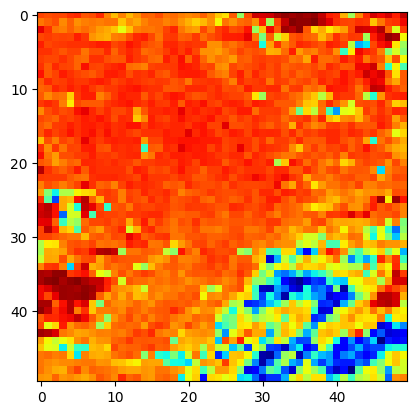

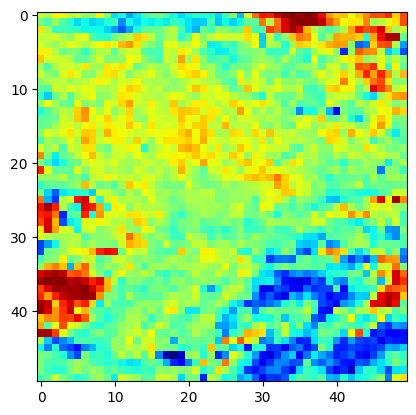

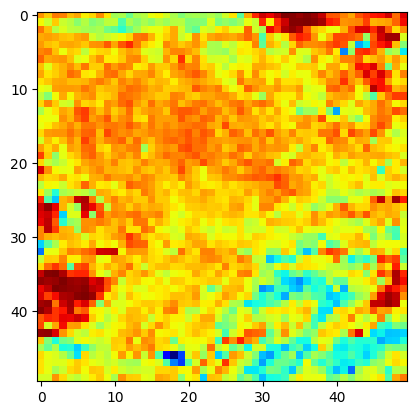

In [3]:
base_path = r"C:\Users\Emem Esther Usoh\Desktop\Machine Learning\Medical\dataset"

folder_dir = os.listdir(base_path)
folder_dir
sel_each_fld = os.path.join(base_path, folder_dir[0])
sel_each_fld
group_img_flds = os.listdir(sel_each_fld)
group_img_flds 
single_image_folder = os.path.join(sel_each_fld, group_img_flds[0])
single_image_folder
images_in_fld = os.listdir(single_image_folder)
img_path = os.path.join(single_image_folder, images_in_fld[0])
img_path

## display an image
import PIL.Image as IMG 
img = np.asarray(IMG.open(img_path))
img.dtype
img.max()
img.shape
plt.imshow(img) 

#the whole image with the 3 channels combinned
## there are 3 channels, let us display the 3 channels
plt.imshow(img[:,:, 0], cmap = "jet")  #first channel
plt.figure()
plt.imshow(img[:,:,1], cmap = "jet") #second channel
plt.figure()
plt.imshow(img[:,:,2], cmap = "jet") #third channel




In [7]:
### write a code that will access all the dataset(images)
## your code will run through all the folders containinf the images
## to do this, all the file path to the images has to be accessible
X = []
Y = []
folder_dir
base_path
for i in range(len(folder_dir)):
    path_1 = os.path.join(base_path, folder_dir[i])
    path_1_dir = os.listdir(path_1)
    # print(path_1_dir)
    for j in range(len(path_1_dir)):
        path_2 = os.path.join(path_1, path_1_dir[j])
        path_2_dir = os.listdir(path_2)
        # print(path_2_dir)
        for k in range(len(path_2_dir)):
            img_path = os.path.join(path_2, path_2_dir[k])
            # print(img_path)
            img = np.asarray(IMG.open(img_path))
            Y.append(int(path_1_dir[j]))
            X.append(img)
        
        
X = np.asarray(X)
Y = np.asarray(Y)

# print(Y.shape)
# print(X.shape)


## Normalize the dataset (0-1)    divide them by 255. we do not normalize Y, just X. X is our target
X = X/255.0
# print(X.max())
# print(X.min())


## split data
x, x_test, y, y_test = train_test_split(X,Y, test_size= 0.2)  ##what is random_state?(this just ensures that the same random values are choosen consistently across all devices)
# print(x.shape)
# print(x_test.shape)
# print(y.shape)
# print(y_test.shape)


## split the x, y into train and validation
x_train, x_val, y_train, y_val= train_test_split(x,y, test_size= 0.1)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)  
print(x_test.shape)
print(y_test.shape) 

## there is no need to reshape because it is the correct formate (50, 50, 3)
## e.g (x_train = x_train[:,:,:, np.newaxis])


## the model has an imbalance of X:Y ratio, we try to balance this by ensuring we split X,Y properly and all features and targets are properly represented (distributed) in each split
from sklearn. model_selection import StratifiedShuffleSplit # this was already imported above
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

for train_index, test_index in sss.split(X,Y):
    x, x_test = X[train_index], X[test_index]
    y, y_test = Y[train_index], Y[test_index]
    


## we have to do same for train and validation data
sss2 = StratifiedShuffleSplit(n_splits=1, test_size = 0.1)

for train_index, test_index in sss2.split(x,y):
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)  
print(x_test.shape)
print(y_test.shape) 


## to check the number of 1's and 0's in the all the sets

num_ones = (y_train == 1).sum()
print(num_ones)

num_zeros = (y_train == 0).sum()
print(num_zeros)

num_one = (y_test == 1).sum()
print(num_one)

num_zero = (y_test ==0).sum()
print(num_zero)

no_one = (x_val == 1).sum()
print(no_one)

no_zero = (y_val == 0).sum()
print(no_zero)


(4840, 50, 50, 3)
(538, 50, 50, 3)
(4840,)
(538,)
(1345, 50, 50, 3)
(1345,)
(5445, 50, 50, 3)
(605, 50, 50, 3)
(5445,)
(605,)
(673, 50, 50, 3)
(673,)
905
4540
112
561
135
504


In [15]:
print(x.shape)
print(x_test.shape)


(6050, 50, 50, 3)
(673, 50, 50, 3)


In [ ]:
### build the model  achitecture 
## Dropout  and Maxpool for improving performance
## note that since Maxpool2D is included, it will be responsible for reducing the dimensions. it will no longer be Conv2D. Maxpool is similar to Conv2D but unlike conv2D, Maxpool does not multiple the weights with random values. it just picks the max weight. the strides in Conv2D will change from 2 to 1 because it is no longer responsible for dimension reduction 
input_to_model = tf.keras.layers.Input(shape = (50,50,3), name = "Input_layer")
x = tf.keras.layers.Conv2D(filters = 32, kernel_size= (3,3), strides = 1, padding= "same", activation= "relu")(input_to_model)
x = tf.keras.layers.Dropout(0.1)(x) ## this drops 30% of the neurons while training, this ensures all the important weights are learned by each neurons, and when the next training set comes, anoda 30% randomly are turned of. this repeated process endures that all the neurons are being trained efficiently and no one is left dormant.
x = tf.keras.layers.MaxPool2D((2,2))(x) ## helps to reduce the dimensions of filter, while keeping the most important weights. it takes the max weight of every filter size, forms a new filter hence reducing the dimensions and computational power


x = tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), strides=1, padding= "same", activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x =  tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Conv2D(filters= 128, kernel_size= (3,3), strides=1, padding= "same", activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x =  tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), strides=1, padding= "same", activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x =  tf.keras.layers.MaxPool2D((2,2))(x)


##input the convoluted images into neural network.
## first we have to flatten() 
x = tf.keras.layers.Flatten()(x)

## first layer of neurons
x = tf.keras.layers.Dense(128, activation= "relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)

## second layer of neurons
x = tf.keras.layers.Dense(256, activation= "relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)

output = tf.keras.layers.Dense(1, activation= "sigmoid", name = "Output_layer")(x)
## sigmoid since it is binary (0,1), the binary_crossentropy as loss
print(x.shape)
print(output.shape)


model = tf.keras.Model(inputs = input_to_model, outputs = output)
model.summary()                                                                                              




(None, 128)
(None, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 dropout_14 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 dropout_15 (Dropout)        (None, 25, 25, 64)        0         
                                     

In [16]:
## compile. we select loss, optimizer, metrics. binary classification
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 1e-4), loss= "binary_crossentropy", metrics= ["accuracy", tf.keras.metrics.Precision(name = "precision") ])

## CALL BACK HERE
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = "best_model_score.h5", ## this just saves the best model score
    # filepath= "model-epoch{epoch:02d}-val_precision{val_precision:.4f}.h5", ## recordes all the best values it gets
    monitor = 'val_precision', #Monitor validation loss
    save_weights_only= True, # Save only model weights, not the full model
    save_best_only= True, # Save weights at each epoch
    mode = 'max', #Save when the loss is minimized
    save_freq='epoch',  # Save weights after every epoch
    verbose=1 ## the writes when a new improvemet happens
)

## train the model 
model_history = model.fit(x = x_train, y = y_train, validation_data=(x_val, y_val), batch_size= 32, epochs= 11, callbacks= [model_checkpoint_callback])  ## CALLBACK HERE

Epoch 1/11
171/171 [==============================] - ETA: 0s - loss: 0.4428 - accuracy: 0.8241 - precision: 0.1558
Epoch 1: val_precision improved from -inf to 0.00000, saving model to best_model_score.h5
171/171 [==============================] - 39s 220ms/step - loss: 0.4428 - accuracy: 0.8241 - precision: 0.1558 - val_loss: 0.4667 - val_accuracy: 0.8331 - val_precision: 0.0000e+00
Epoch 2/11
103/171 [=================>............] - ETA: 17s - loss: 0.3753 - accuracy: 0.8407 - precision: 0.6716

KeyboardInterrupt: 

In [ ]:
## model weight

22/22 [==============================] - 1s 25ms/step - loss: 0.3072 - accuracy: 0.8826 - precision: 0.6279
dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


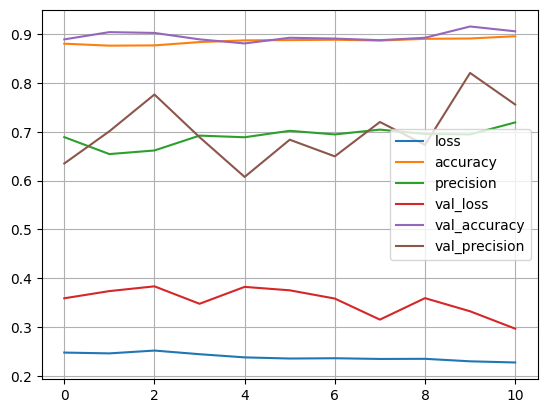

In [14]:
### evaluation on test set
test_score = model.evaluate(x_test, y_test)

##visualization
keys  = model_history.history.keys()
print(keys) ## these are the parameters measured during training

df = pd.DataFrame(model_history.history)
df.plot()
plt.grid(True)

In [ ]:
## save model, load model
#model.save("yhd.h5")
#model = tf.keras.models.load_model("yhd.h5")

In [12]:
## make prediction

y_pred_probability = model.predict(x_test)
## binary classification (0-1) - just one output. 
## this is a bianry classificatin hence, output of classification is a prob, so we make a decision boundary - example- anything above 0.5 prob, take as one and anything below 0.5, take as 0.
y_pred = np.where(y_pred_probability > 0.5, 1, 0).flatten() ## flatten to look likr the y_test
print(y_pred)
print(y_pred.shape)
print(y_pred.max())
print(y_pred.min())
print(y_test)
print(y_test.shape)

43/43 [==============================] - 0s 9ms/step
[0 0 0 ... 0 0 0]
(1345,)
1
0
[0 0 0 ... 0 0 0]
(1345,)


0.872
0.869
0.872
[[1047   80]
 [  92  126]]


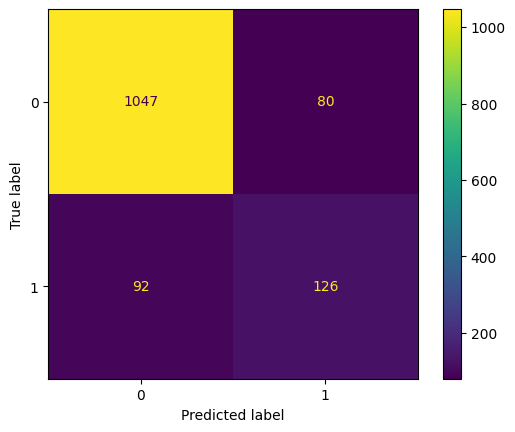

In [13]:
### metrics : precision, recall and accuracy  ## we really need a high precision here because of the sensitivity of the task. predicting or detecting the likelihood of cancer is very important

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

test_acc = round(accuracy_score(y_test, y_pred),3)
test_pre = round(precision_score(y_test, y_pred, average= "weighted"),3)
test_rec = round(recall_score(y_test, y_pred, average= "weighted"), 3) 


print(test_acc)
print(test_pre)
print(test_rec)

cm = confusion_matrix(y_test, y_pred, labels= [0,1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()